In [19]:

# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from urllib.request import urlopen
from scipy.stats import ttest_ind # t-tests
from scipy import stats
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
import statsmodels.api as sm
import statsmodels.formula.api as amf

matplotlib.style.use('ggplot')
%matplotlib inline 

In [64]:
#Read data
df = pd.read_csv('data/20520-0001-Data.tsv', sep='\t');

#Extract Third Phase Data from whole dataset (v400~v450 + CaseID)
df_thirdPhase = df.loc[:, 'v400':'CASEID']
df_thirdPhase['parentsScore'] = df['p144']
df_thirdPhase['ParentSpeak'] = df['p28a']
df_thirdPhase['ParentUnderstand'] = df['p28b']
df_thirdPhase['ParentRead'] = df['p28c']
df_thirdPhase['ParentWrite'] = df['p28d']
df_thirdPhase['origin'] = df['v21']

#drop rows that does not have data on Third Phase (v400 == 0 are responses not for Third Phase)
df_thirdPhase = df_thirdPhase[df_thirdPhase['v400'] == 1]


//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (4,15,16,18,19,21,22,23,24,25,51,67,101,107,115,117,119,121,123,129,135,136,137,522,524,542,545,611,663) have mixed types. Specify dtype option on import or set low_memory=False.



In [68]:

#Changing column names
df_needed = df_thirdPhase[['origin', 'parentsScore','ParentSpeak', 'ParentUnderstand', 'ParentRead', 'ParentWrite', 'v407a', 'v415e', 'v428b', 'v429a','v429b', 'v429c','v429d',  'v431', 'v433', 'v434', 'v435', 'v444', 'v445', 'v447', 'CASEID']];
df_needed.columns = ['origin' , 'ParentsScore', 'ParentSpeak', 'ParentUnderstand', 'ParentRead', 'ParentWrite', 'Highest_academic_years', 'curJobScore' ,'non_English_understandability','English_speakability','English_understandability','English_readability','English_writability', 'most spoken language','race', 'race identity importance', 'felt_discrimination',  'visits to parents country', 'lived in parents country', 'home country', 'caseid']

#Drop datas without Pristige Job Score and Parent's Pristiege job score
df_three = df_needed[(df_needed.curJobScore != ' ')  & (df_needed.ParentsScore != ' ')]


#Change the dataType to num from string
df_three['curJobScore'] = pd.to_numeric(df_three['curJobScore'], errors='coerce')
df_three['ParentsScore'] = pd.to_numeric(df_three['ParentsScore'], errors='coerce')
df_three['English_speakability'] = pd.to_numeric(df_three['English_speakability'], errors='coerce')
df_three['English_understandability'] = pd.to_numeric(df_three['English_understandability'], errors='coerce')
df_three['English_readability'] = pd.to_numeric(df_three['English_readability'], errors='coerce')
df_three['English_writability'] = pd.to_numeric(df_three['English_writability'], errors='coerce')
df_three['ParentWrite'] = pd.to_numeric(df_three['ParentWrite'], errors='coerce')
df_three['ParentSpeak'] = pd.to_numeric(df_three['ParentSpeak'], errors='coerce')
df_three['ParentUnderstand'] = pd.to_numeric(df_three['ParentUnderstand'], errors='coerce')
df_three['ParentRead'] = pd.to_numeric(df_three['ParentRead'], errors='coerce')

#Drop null values
df_three = df_three[np.isfinite(df_three['ParentWrite'])]
df_three = df_three[np.isfinite(df_three['ParentRead'])]
df_three = df_three[np.isfinite(df_three['ParentSpeak'])]
df_three = df_three[np.isfinite(df_three['ParentUnderstand'])]


#Create diff column that is the difference between Parent's Prestiege score and child's prestiege score
df_three['diff'] = df_three.curJobScore - df_three.ParentsScore
#Create English variable that is the average of writability, readability, understandability, and speakability of the immigrant child at age over 24
df_three['English'] = (df_three.English_writability + df_three.English_readability + df_three.English_understandability + df_three.English_speakability) / 4

#Create ParentEnglish variable that is the average of writability, readability, understandability, and speakability of the immigrant parent
df_three['ParentEnglish'] = (df_three.ParentRead + df_three.ParentUnderstand + df_three.ParentSpeak + df_three.ParentWrite) / 4
print(df_three)



#Dropping empty values for Highest_academic_years
df_dropped = df_needed[df_needed['Highest_academic_years']!= ' ']

#Adding a column of general Language_understandability
df_dropped = df_dropped[df_dropped['English_understandability'] != ' ']
df_dropped = df_dropped[df_dropped['non_English_understandability'] != ' ']
    
df_dropped['English_understandability'] = pd.to_numeric(df_dropped['English_understandability'] , errors='coerce')
df_dropped['non_English_understandability'] = pd.to_numeric(df_dropped['non_English_understandability'] , errors='coerce')
df_dropped['Language_understandability'] = (df_dropped['non_English_understandability'] + df_dropped['English_understandability'])/2



#size of the dataframe
np.shape(df_dropped)

#variable names
varNames = list(df_dropped)

#Summary
print(df_dropped.describe())
list(df_three)



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

      origin  ParentsScore  ParentSpeak  ParentUnderstand  ParentRead  \
4          4            44          2.0               2.0         2.0   
8          1            42          3.0               4.0         4.0   
10        18            52          4.0               4.0         4.0   
16         3            31          2.0               2.0         3.0   
17        50            60          4.0               4.0         4.0   
22         3            50          4.0               4.0         4.0   
25         1            26          2.0               3.0         3.0   
30         1            49          4.0               4.0         4.0   
33         1            53          2.0               2.0         2.0   
34         4            53          2.0               2.0         2.0   
35        13            29          4.0               4.0         4.0   
36         2            60          3.0               3.0         3.0   
38         1            53          3.0            

['origin',
 'ParentsScore',
 'ParentSpeak',
 'ParentUnderstand',
 'ParentRead',
 'ParentWrite',
 'Highest_academic_years',
 'curJobScore',
 'non_English_understandability',
 'English_speakability',
 'English_understandability',
 'English_readability',
 'English_writability',
 'most spoken language',
 'race',
 'race identity importance',
 'felt_discrimination',
 'visits to parents country',
 'lived in parents country',
 'home country',
 'caseid',
 'diff',
 'English',
 'ParentEnglish']

In [22]:
#Data Structure


#size of the dataframe
print(np.shape(df_dropped))

#variable names
list(df_dropped)

#Summary
print(df_dropped.describe())



(2853, 21)
       non_English_understandability  English_understandability       caseid  \
count                    2853.000000                2853.000000  2853.000000   
mean                        3.592359                   3.904311  1623.860848   
std                         0.671216                   0.345720   910.489267   
min                         1.000000                   1.000000     1.000000   
25%                         3.000000                   4.000000   871.000000   
50%                         4.000000                   4.000000  1659.000000   
75%                         4.000000                   4.000000  2386.000000   
max                         4.000000                   4.000000  5262.000000   

       Language_understandability  
count                 2853.000000  
mean                     3.748335  
std                      0.402614  
min                      1.000000  
25%                      3.500000  
50%                      4.000000  
75%             

Univaraite Analysis (by race)

In [23]:
df_dropped['Highest_academic_years'] = df_dropped['Highest_academic_years'].apply(pd.to_numeric)
import plotly.graph_objs as go
import plotly.plotly as py

import plotly.tools as tls
py.sign_in('jessro95', 'QLqhsISQzdI2aJUEKNky')

#print(df_dropped.race.unique().size)
df_race = df_dropped[['felt_discrimination', 'Highest_academic_years']].groupby('felt_discrimination').agg('mean')


trace0 = go.Box(
    y= df_dropped[df_dropped['felt_discrimination'] == '0']['Highest_academic_years'],
    name = "Felt NO discrimination"
)
trace1 = go.Box(
    y=df_dropped[df_dropped['felt_discrimination'] == '1']['Highest_academic_years'],
    name = 'Felt discrimination'
)

layout = {
    'xaxis': {
        'title': 'Have you ever felt discriminated against because of your race or ethnicity?',
        'zeroline': False,
    },
    'yaxis' : {
        'title': 'Highest_academic_years'
    },
    'boxmode': 'group',
    'title':'Felt Discrimination vs. Highest_academic_years',

}

data = [trace0, trace1]
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.814
Date:                Mon, 06 Mar 2017   Prob (F-statistic):             0.0938
Time:                        14:05:29   Log-Likelihood:                -3541.4
No. Observations:                 843   AIC:                             7087.
Df Residuals:                     841   BIC:                             7096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               12.5425 

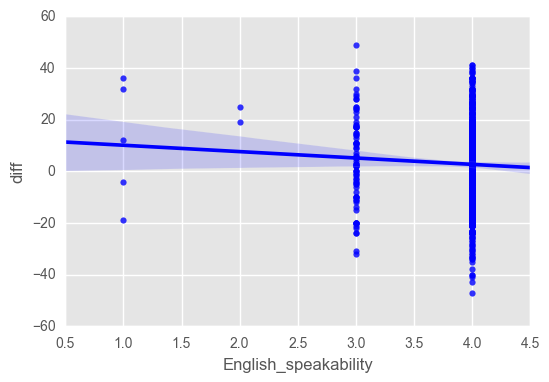

In [28]:
speak = smf.ols(formula = 'diff ~ English_speakability', data =df_three).fit()
mobSpeak = sns.regplot(x= df_three['English_speakability'], y= df_three['diff'], data=df_three, color = 'b')

### rater 1 summary
print(speak.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3019
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.583
Time:                        14:05:29   Log-Likelihood:                -3543.2
No. Observations:                 843   AIC:                             7090.
Df Residuals:                     841   BIC:                             7100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               6.3038    

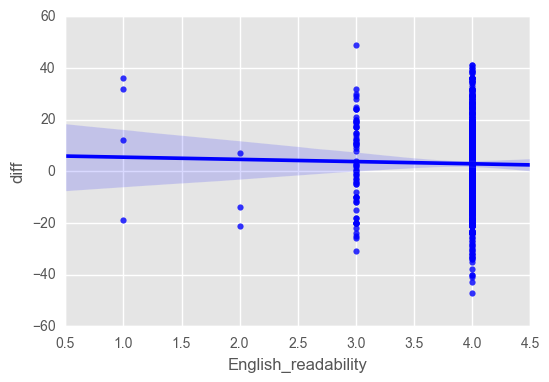

In [29]:
read = smf.ols(formula = 'diff ~ English_readability', data =df_three).fit()
mobRead = sns.regplot(x= df_three['English_readability'], y= df_three['diff'], data=df_three, color = 'b')

### rater 1 summary
print(read.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9311
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.335
Time:                        14:05:30   Log-Likelihood:                -3546.5
No. Observations:                 844   AIC:                             7097.
Df Residuals:                     842   BIC:                             7106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

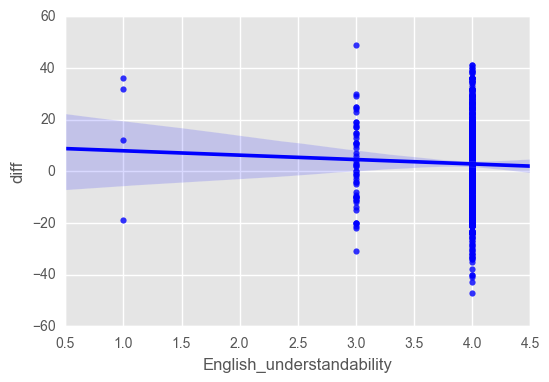

In [30]:
under = smf.ols(formula = 'diff ~ English_understandability', data =df_three).fit()
mobUnder = sns.regplot(x= df_three['English_understandability'], y= df_three['diff'], data=df_three, color = 'b')

### rater 1 summary
print(under.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07230
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.788
Time:                        14:05:30   Log-Likelihood:                -2972.8
No. Observations:                 708   AIC:                             5950.
Df Residuals:                     706   BIC:                             5959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               3.9947    

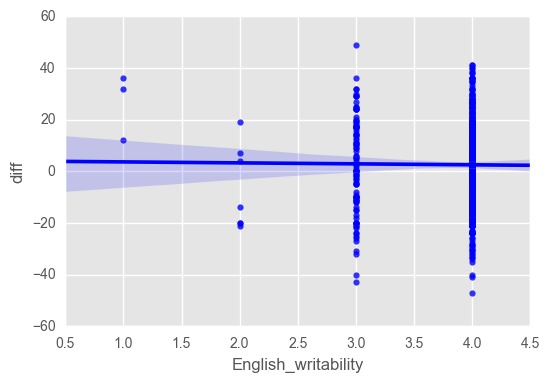

In [31]:
write = smf.ols(formula = 'diff ~ English_writability', data =df_three).fit()
mobWrite = sns.regplot(x= df_three['English_writability'], y= df_three['diff'], data=df_three, color = 'b')

### rater 1 summary
print(write.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.960
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.162
Time:                        17:51:17   Log-Likelihood:                -2956.4
No. Observations:                 704   AIC:                             5917.
Df Residuals:                     702   BIC:                             5926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3104      7.021      1.753      0.0

['origin',
 'ParentsScore',
 'ParentSpeak',
 'ParentUnderstand',
 'ParentRead',
 'ParentWrite',
 'Highest_academic_years',
 'curJobScore',
 'non_English_understandability',
 'English_speakability',
 'English_understandability',
 'English_readability',
 'English_writability',
 'most spoken language',
 'race',
 'race identity importance',
 'felt_discrimination',
 'visits to parents country',
 'lived in parents country',
 'home country',
 'caseid',
 'diff',
 'English',
 'ParentEnglish']

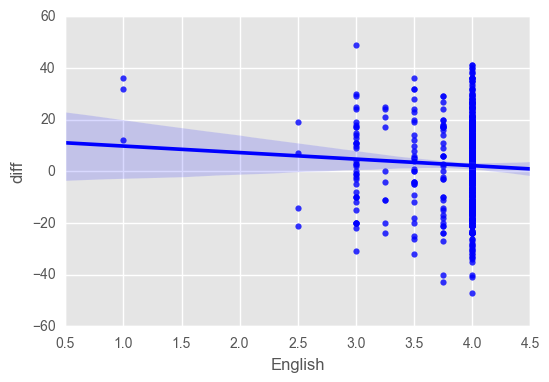

In [69]:
df_ddddd = df_three[np.isfinite(df_three['English'])]

eng = smf.ols(formula = 'diff ~ English', data =df_ddddd).fit()
mobeng = sns.regplot(x= df_ddddd['English'], y= df_ddddd['diff'], data=df_ddddd, color = 'b')

### rater 1 summary
print(eng.summary())

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     54.30
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           4.84e-13
Time:                        14:05:32   Log-Likelihood:                -2931.2
No. Observations:                 704   AIC:                             5866.
Df Residuals:                     702   BIC:                             5875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3486      0.788     -1.712      0.0

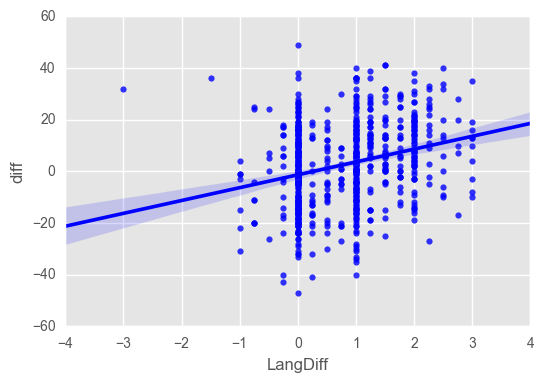

In [33]:
df_ddddd['LangDiff'] = df_ddddd.English - df_ddddd.ParentEnglish

eng = smf.ols(formula = 'diff ~ LangDiff', data =df_ddddd).fit()
mobeng = sns.regplot(x= df_ddddd['LangDiff'], y= df_ddddd['diff'], data=df_ddddd, color = 'b')

### rater 1 summary
print(eng.summary())

                            OLS Regression Results                            
Dep. Variable:            curJobScore   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     12.76
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           0.000374
Time:                        14:05:32   Log-Likelihood:                -3407.8
No. Observations:                 884   AIC:                             6820.
Df Residuals:                     882   BIC:                             6829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       40.4695      1.327     30.496   

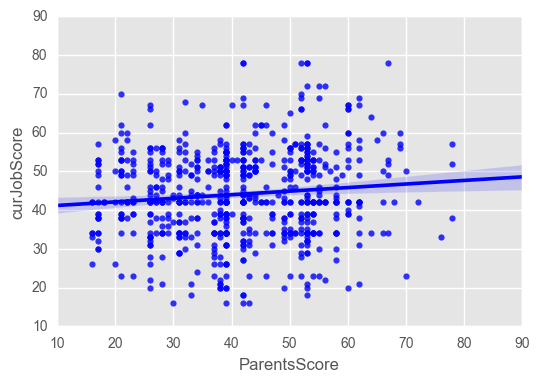

In [34]:

eng = smf.ols(formula = 'curJobScore ~ ParentsScore', data =df_three).fit()
mobeng = sns.regplot(x= df_ddddd['ParentsScore'], y= df_ddddd['curJobScore'], data=df_ddddd, color = 'b')

### rater 1 summary
print(eng.summary())

[  6.03521005e+00   8.45451426e-02   2.07630647e+00   8.45451426e-02
   6.03521005e+00   3.53990758e+00   2.90862497e-02   2.45747774e-01
   8.45451426e-02   8.45451426e-02   8.45451426e-02   6.03521005e+00
   5.09910852e+01   6.03521005e+00   3.53990758e+00   7.14316243e-01
   8.45451426e-02   1.75425742e+01   8.45451426e-02   3.53990758e+00
   8.45451426e-02   8.45451426e-02   1.02894665e+01   2.45747774e-01
   1.21784212e+00   6.03521005e+00   6.03521005e+00   1.21784212e+00
   6.03521005e+00   8.45451426e-02   7.14316243e-01   1.44141530e-01
   1.21784212e+00   8.45451426e-02   7.14316243e-01   1.21784212e+00
   8.45451426e-02   1.21784212e+00   7.14316243e-01   4.18976881e-01
   6.03521005e+00   7.14316243e-01   4.95893248e-02   3.53990758e+00
   8.45451426e-02   8.45451426e-02   8.45451426e-02   2.45747774e-01
   1.21784212e+00   8.45451426e-02   8.45451426e-02   6.03521005e+00
   6.03521005e+00   4.18976881e-01   8.45451426e-02   8.45451426e-02
   2.99084419e+01   8.45451426e-02

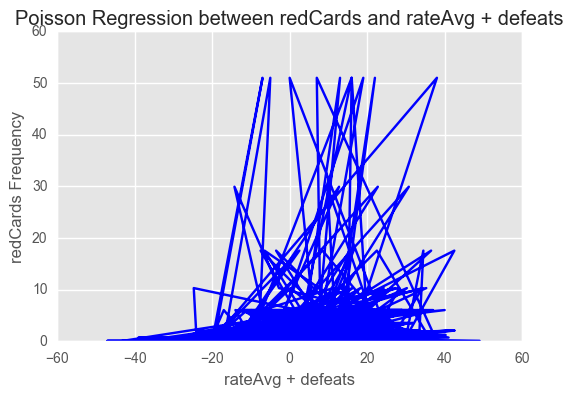

In [35]:
mod1 = smf.glm(formula = 'diff ~ LangDiff', data = df_ddddd, family = sm.families.Poisson()).fit()
predict1 = mod1.predict()

print(predict1)


TypeError: len() of unsized object

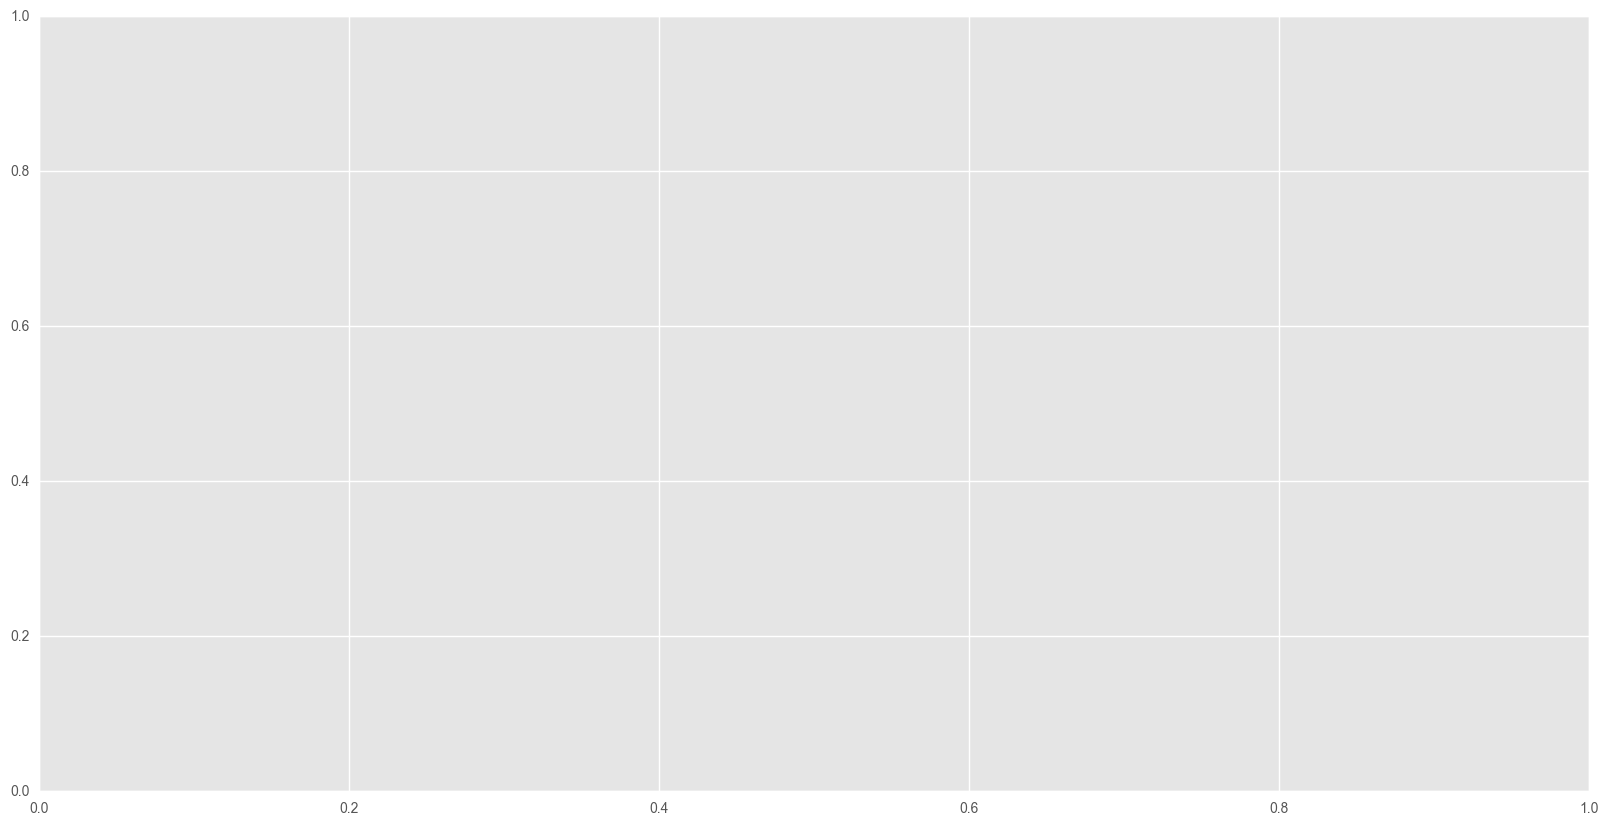

In [59]:
df_dropped = df_dropped[(df_dropped.felt_discrimination != ' ')]
logistic_model = smf.glm(formula = 'felt_discrimination ~ Highest_academic_years', data=df_dropped, family=sm.families.Binomial()).fit()
discrimination = df_dropped[df_dropped['felt_discrimination'] == '1']
noDiscrimination = df_dropped[df_dropped['felt_discrimination'] == '0']


# Draw histograms of the distribution (perhaps overlapping histogram on the same chart)
plt.figure(figsize=(20,10))
plt.hist(noDiscrimination.Highest_academic_years, alpha=0.5, label='noDiscrimination')
plt.hist(discrimination.Highest_academic_years, alpha=0.5, label='Discrimination')
plt.legend(loc='upper right')
plt.show()


df_dropped['logistic_preds'] = logistic_model.predict()


# Visualize the predicted probabilities across balances (bonus: add the observed values as well)
df_dropped = df_dropped.sort_values(by='felt_discrimination') # sort values for graphic
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(noDiscrimination.Highest_academic_years, noDiscrimination.felt_discrimination, c='blue', label="Felt Discriminated")
ax.scatter(discrimination.Highest_academic_years, discrimination.felt_discrimination, c='red', label="Did Not Fill Discriminated")
ax.plot(df_dropped.Highest_academic_years, df_dropped.logistic_preds, c='black', label="Logistic Fit")
ax.legend(numpoints=1, loc='upper left')
ax.set_xlabel('Highest Academic Years')
ax.set_ylabel('Probability of feeling Discriminated')
plt.show()

logistic_model.summary()


In [55]:
print(df['v438'])

0       3
1       5
2       4
3       2
4       3
5       1
6       1
7       1
8        
9        
10       
11      5
12      1
13      1
14      2
15       
16       
17       
18       
19      4
20      3
21       
22      1
23       
24      5
25      5
26      2
27      5
28       
29       
       ..
5232     
5233     
5234     
5235     
5236     
5237     
5238     
5239     
5240     
5241     
5242     
5243     
5244     
5245     
5246     
5247     
5248     
5249     
5250     
5251     
5252    3
5253     
5254    1
5255     
5256    1
5257    5
5258     
5259     
5260     
5261     
Name: v438, dtype: object


In [60]:
#result = speak = smf.ols(formula = 'curJobScore ~ English_speakability', data =df_three).fit()
df_one = df[df]

['ParentsScore',
 'ParentSpeak',
 'ParentUnderstand',
 'ParentRead',
 'ParentWrite',
 'Highest_academic_years',
 'curJobScore',
 'non_English_understandability',
 'English_speakability',
 'English_understandability',
 'English_readability',
 'English_writability',
 'most spoken language',
 'race',
 'race identity importance',
 'felt_discrimination',
 'visits to parents country',
 'lived in parents country',
 'home country',
 'caseid',
 'diff',
 'English',
 'ParentEnglish']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.998
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.163
Time:                        17:53:35   Log-Likelihood:                -244.22
No. Observations:                  58   AIC:                             492.4
Df Residuals:                      56   BIC:                             496.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.4393      4.139      1.556      0.1

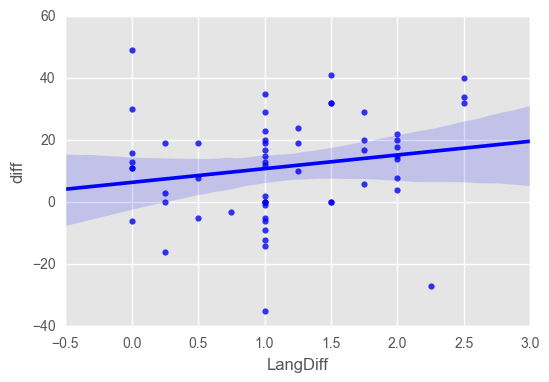

In [78]:
df_vietnam = df_ddddd[df_ddddd.origin == 31]
eng = smf.ols(formula = 'diff ~ LangDiff', data =df_vietnam).fit()
mobeng = sns.regplot(x= df_vietnam['LangDiff'], y= df_vietnam['diff'], data=df_vietnam, color = 'b')

### rater 1 summary
print(eng.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4.322
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.173
Time:                        17:54:14   Log-Likelihood:                -8.4650
No. Observations:                   4   AIC:                             20.93
Df Residuals:                       2   BIC:                             19.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.4246      2.824      5.461      0.0

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



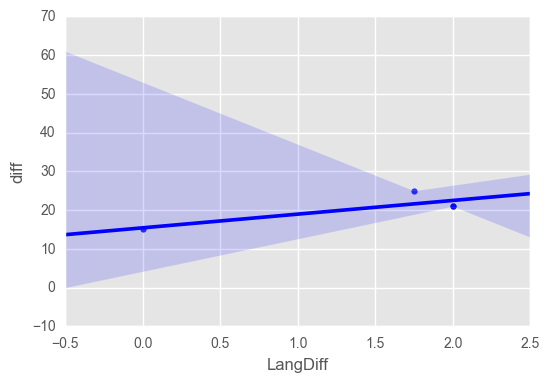

In [79]:
df_hmong = df_ddddd[df_ddddd.origin == 34]
eng = smf.ols(formula = 'diff ~ LangDiff', data =df_hmong).fit()
mobeng = sns.regplot(x= df_hmong['LangDiff'], y= df_hmong['diff'], data=df_hmong, color = 'b')

### rater 1 summary
print(eng.summary())